
# MECANISMO BIELA-MANIVELA INVERTIDA 

## PROBLEMA POSICIÓN

### PASO 1: MODELADO DEL MECANISMO

El mecanismo de partida es el conocido como biela-manivela invertida. Podemos ver todas las variables en la figura.

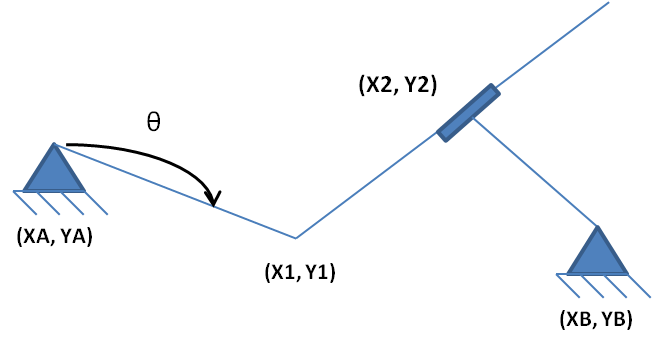

### PASO 2: GRADOS DE LIBERTAD

Los grados de libertad se calculan:

$G = 3·(n-1) - 2·PI - PII$

Siendo:

PI -> Numero de pares binarios de un grado de libertad 

PII -> Número de pares binarios de dos grados de libertad.
En este caso tendríamos:

\begin{eqnarray}
n &=& 5  \\
P_{I} &=& 5    \\
P_{II} &=& 0 
\end{eqnarray}

Por lo tanto:

$G = 3·(5-1) - 2·5 - 0 = 2$ 

### PASO 3: DEFINICIÓN DEL VECTOR q

El vector $\mathbf{q}$ de dimensión $N \times 1$ contiene las coordenadas dependientes del mecanismo. Es decir, contiene las coordenadas que no se mantienen fijas ya que varían con el tiempo. 

Lo hemos modelizado enpleando las $8$ coordenadas:

\begin{equation}
\mathbf{q} = 
 \begin{bmatrix}
 x_1 \\ y_1 \\ x_2 \\ y_2 \\ x_3 \\ y_3 \\ \theta \\ \beta
 \end{bmatrix}
\end{equation}

### PASO 4: IMPLEMENTACIÓN EN PYTHON

Al igual que en otros entornos de programación, necesitamos añadir librerías que contengan las funciones que vamos a utilizar. Esto es necesario hacerlo al principio del código. Las que vamos a usar son las siguientes: 

1. numpy -> Sirve para trabajar con arrays y matrices, ofreciendo una interfaz similar a los comandos en MATLAB. 
2. math -> La utilizaremos para usar funciones matemáticas.
3. pprint -> "pretty print", su función es ayudar a depurar el código.
4. matplotlib.pyplot -> Es necesaria para dibujar gráficas.

In [ ]:
#PASO 4

import numpy as np
import math as math
import pprint  
import matplotlib.pyplot as plt  
import scipy.integrate as integrate 

### PASO 5: LECTURA DE DATOS

Los datos iniciales de los que partiremos para resolver este mecanismo mediante análisis cinemático por métodos numéricos son los parámetros constantes que definen el mecanismo, es decir, las variables que no cambian con el tiempo. En este caso serían las longitudes de las barras y las posiciones de los apoyos.

Además, como el mecanismo tiene dos grados de libertad, tenemos que escoger las **variables independientes** entre las componentes del vector q. En este caso hemos escogido los ángulos, por lo que también será un dato de partida.

1. Longitudes de las barras: $L_1, ~ L_2 ~ L_3 ~ y ~ L_4$.
2. Posición de los dos apoyos: $X_A, ~ Y_A, ~ X_B ~ e ~ Y_B$.
3. Ángulo que forma la primera barra respecto a la horizontal en radianes: $θ(t=0)$.
4. Ángulo que forma la cuarta barra respecto a la horizontal en radianes: $\beta(t=0)$

Una vez tengamos esos datos, definiremos una posición inicial.

In [ ]:

print ('BIELA-MANIVELA INVERTIDA')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input ('Introduce angulo inicial beta: '))
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["YB"] = float (input ('Introduce coordenada en y del punto B:'))
meca["XA"] = 0
meca["YA"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [0.2], [1], [0.2], [meca["XB"]+meca["L3"]*math.cos(meca["beta"])], [meca["YB"]+meca["L3"]*math.sin(meca["beta"])], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

### PASO 6: MATRIZ DE RESTRICCIONES $\Phi(q)$

